In [1]:
%load_ext autoreload
%autoreload 2
from fastai import *
from fastai.text import *
torch.cuda.set_device(1)

In [2]:
data_path = Config.data_path(); data_path

PosixPath('/home/momgpu/.fastai/data')

In [3]:
bs = 64

In [4]:
lang = 'fr'
name = f'{lang}wiki'
path = data_path/name

In [5]:
mdl_path = path/'models'
mdl_path.mkdir(exist_ok=True)

In [6]:
df = pd.read_csv(f"{path}/1sttry.csv")

In [18]:
df = df[:45000]

In [19]:
df

,text
0,L’électroencéphalographie quantitative est la...
1,L'église Maria Martental (littéralement: égli...
2,L’Éthiopie s’est accommodée au cours de son H...
3,"Risque (titre original : """") est une nouvelle..."
4,L'anglais basic (pour ) est un sous-ensemble ...
5,"Georgette Chen, née Chang Li Ying () est une ..."
6,"Édouard Finn, né le 20 juillet 1938 à Bruxell..."
7,"Maurice (Prosper Gilles) Rheims (Versailles, ..."
8,"Sad (arabe : سورة ص, français : """"La lettre S..."
9,"Kristina Söderbaum, (, Stockholm - , Hitzacke..."


In [30]:
df.to_csv(mdl_path/"train.csv")

In [6]:
df_TEMP = pd.read_csv(mdl_path/"train.csv")

In [35]:
df_TEMP

,text
0,L’électroencéphalographie quantitative est la...
1,L'église Maria Martental (littéralement: égli...
2,L’Éthiopie s’est accommodée au cours de son H...
3,"Risque (titre original : """") est une nouvelle..."
4,L'anglais basic (pour ) est un sous-ensemble ...
5,"Georgette Chen, née Chang Li Ying () est une ..."
6,"Édouard Finn, né le 20 juillet 1938 à Bruxell..."
7,"Maurice (Prosper Gilles) Rheims (Versailles, ..."
8,"Sad (arabe : سورة ص, français : """"La lettre S..."
9,"Kristina Söderbaum, (, Stockholm - , Hitzacke..."


In [7]:
tokenizer = Tokenizer(lang='fr', n_cpus=24)

data_lm = TextLMDataBunch.from_csv(mdl_path, tokenizer=tokenizer, bs=bs, csv_name='train.csv', text_cols=0)

In [8]:
data_lm.save('data_lm')

In [10]:
mdl_path

PosixPath('/home/momgpu/.fastai/data/frwiki/models')

In [6]:
data_lm = load_data(mdl_path, 'data_lm', bs=bs)

In [7]:
weights_pretrained = '/home/momgpu/.fastai/data/frwiki/models/1st50k_with_60kvocab'
itos_pretrained = '/home/momgpu/.fastai/data/frwiki/models/itos_60kvocab'
pretained_data = (weights_pretrained, itos_pretrained)

In [8]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained_fnames=pretained_data, drop_mult=0)
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


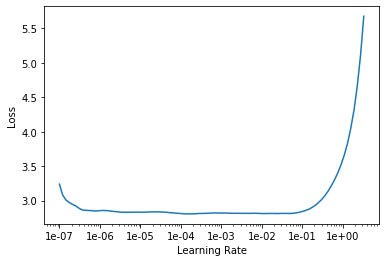

In [9]:
learn.lr_find()
learn.recorder.plot(skip_start=0)

In [10]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

In [ ]:
learn.save('head_pretrained')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, 1e-3, moms=(0.8,0.7))

In [ ]:
learn.save('lm_fine_tuned')

In [ ]:
learn.save_encoder('ft_enc')

In [8]:
wiki_itos = pickle.load(open(mdl_path/"60kvocab.pkl", 'rb'))

In [14]:
dir(wiki_itos)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [15]:
good_itos = pickle.load(open(mdl_path/"itos_60kvocab.pkl", 'rb'))

In [16]:
good_itos == wiki_itos

True

In [17]:
good_itos.itos

AttributeError: 'list' object has no attribute 'itos'